<h1>Data visualization</h1>

In [63]:
#%pip install pandas matplotlib seaborn numpy mysql-connector-python plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mysql.connector
import plotly.express as pe

In [2]:
#connection to database
connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="1234",
            database = "pszbooks4"
        )
db_cursor = connection.cursor()

In [3]:
sql = 'select * from books;'
books = pd.read_sql(sql, con = connection)
sql = 'select * from genres;'
genres = pd.read_sql(sql, con = connection)
sql = 'select * from authors;'
authors = pd.read_sql(sql, con = connection)
sql = 'select * from wrote;'
wrote = pd.read_sql(sql, con = connection)
sql = 'select * from isgenre;'
isgenre = pd.read_sql(sql, con = connection)

C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\882380059.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  books = pd.read_sql(sql, con = connection)
C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\882380059.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  genres = pd.read_sql(sql, con = connection)
C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\882380059.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  authors = pd.read_sql(sql, con = connection)
C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\882380059.py:8: Use

<h3>a)The 10 publishers with the largest number of books on offer.</h3>

C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\1976581432.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




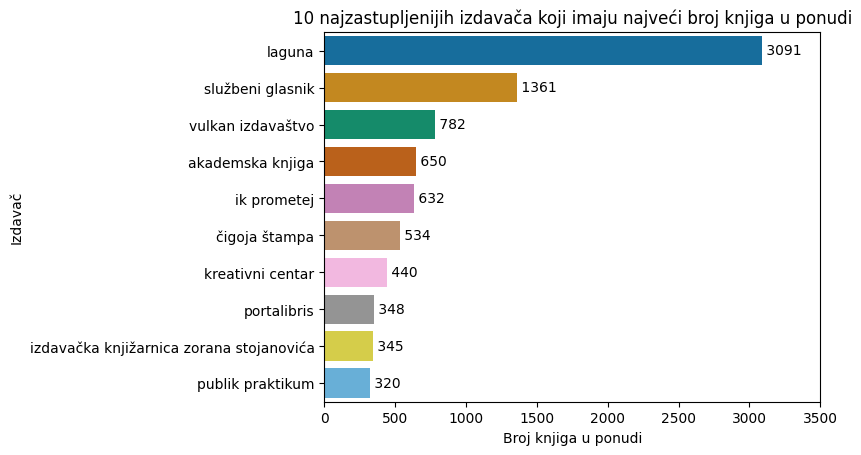

In [65]:
publisher_top_10 = books['publisher'].value_counts().nlargest(10)
publisher_top_10_plot = sb.barplot(x=publisher_top_10.values, y=publisher_top_10.index, palette='colorblind')
for i in range(len(publisher_top_10.values)):
    publisher_top_10_plot.text(publisher_top_10.values[i], i, " " + str(publisher_top_10.values[i]), va='center')
publisher_top_10_plot.set_xlim(0, 3500)
plt.xlabel('Broj knjiga u ponudi')
plt.ylabel('Izdavač')
plt.title('10 najzastupljenijih izdavača koji imaju najveći broj knjiga u ponudi')
plt.show()

<h3>b) Number of books by categories (genres).</h3>

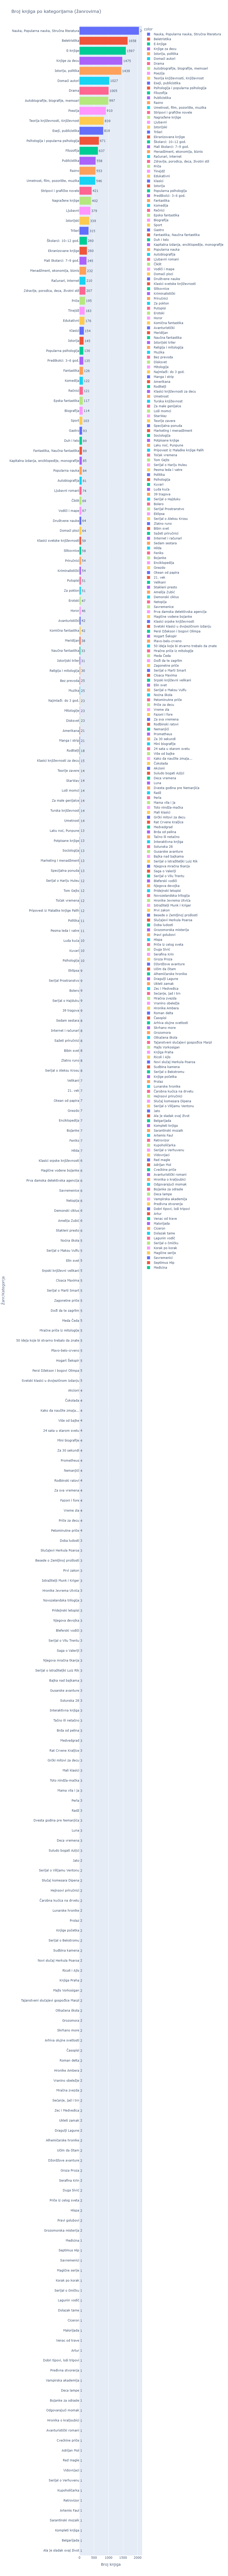

In [5]:
number_of_books_for_genre = isgenre['idGenre'].value_counts()
genres_names = genres.iloc[number_of_books_for_genre.index - 1]['name'].tolist()
genre_book_counts_chart = pe.bar(x = number_of_books_for_genre.values, y = genres_names, orientation = 'h', title = 'Broj knjiga po kategorijama (žanrovima)', text = number_of_books_for_genre.values, color = genres_names)
genre_book_counts_chart.update_layout(yaxis_categoryorder='total ascending', yaxis=dict(title='Žanr/Kategorija'), xaxis=dict(title='Broj knjiga'), height=10000, width = 1350)
genre_book_counts_chart.update_traces(texttemplate='%{text}', textposition='outside')
genre_book_counts_chart.show()

<h3>c) Number of published books by decade (1961-1970, 1971-1980, 1981-1990, 1991-2000, 2001-2010, 2011-2020, 2021-present).</h3>

C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\1598235088.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




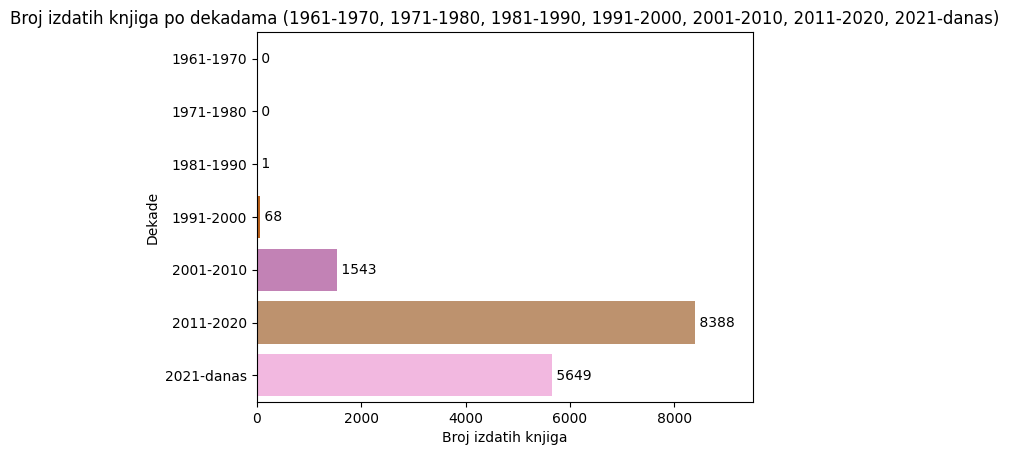

In [66]:
books['decade'] = ((books['year'] - 1) // 10)*10 + 1
decade_barplot_set = books['decade'].value_counts()
new_index = pd.Index(range(1961, 2031, 10))
decade_barplot_set = decade_barplot_set.reindex(new_index, fill_value=0)

decades_plot = sb.barplot(x=decade_barplot_set.values, y = [f"{start_year}-danas" if start_year == 2021 else f"{start_year}-{start_year + 9}" for start_year in decade_barplot_set.index], palette='colorblind')
for i in range(len(decade_barplot_set.values)):
    decades_plot.text(decade_barplot_set.values[i], i, " " + str(decade_barplot_set.values[i]), va='center')
decades_plot.set_xlim(0, 9500)

plt.ylabel('Dekade')
plt.xlabel('Broj izdatih knjiga')
plt.title('Broj izdatih knjiga po dekadama (1961-1970, 1971-1980, 1981-1990, 1991-2000, 2001-2010, 2011-2020, 2021-danas)')
plt.show()

<h3>d) Number (and percentage) of books sold, for the top 5 publishing houses with the largest 
by the number of books. </h3>

C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\3218764800.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




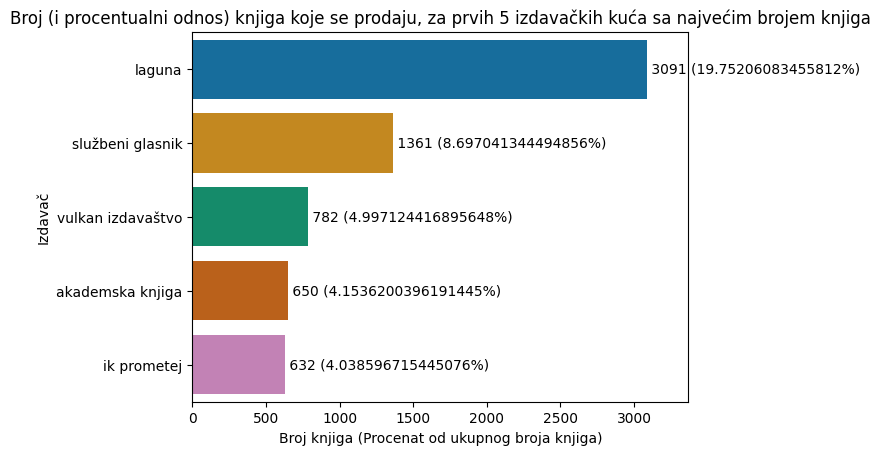

In [11]:
publisher_top_5 = books['publisher'].value_counts().nlargest(5)
publisher_top_5_percentages = publisher_top_5.values / (len(books) / 100)
publisher_top_5_plot = sb.barplot(x=publisher_top_5.values, y=publisher_top_5.index, palette='colorblind')
for i in range(len(publisher_top_5.values)):
    publisher_top_5_plot.text(publisher_top_5.values[i], i, f" {publisher_top_5.values[i]} ({publisher_top_5_percentages[i]}%)", va='center')
publisher_top_5_plot.set_xlim(0, 3370)
plt.xlabel('Broj knjiga (Procenat od ukupnog broja knjiga)')
plt.ylabel('Izdavač')
plt.title('Broj (i procentualni odnos) knjiga koje se prodaju, za prvih 5 izdavačkih kuća sa najvećim brojem knjiga')
plt.show()

<h3>e) Number (and percentage ratio) of all books for sale, which by price belong to one of 
following ranges:
    <ul>
        <li>less than or equal to 500 dinars, </li>
        <li>between 501 and 1500 dinars, </li>
        <li>between 1501 and 3000 dinars, </li>
        <li>between 3001 and 5000 dinars, </li>
        <li>between 5001 and 10000 dinars, </li>
        <li>between 10,001 and 15,000 dinars, </li>
        <li>15001 or more.</li>
    </ul>
</h3>

C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\3705899105.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




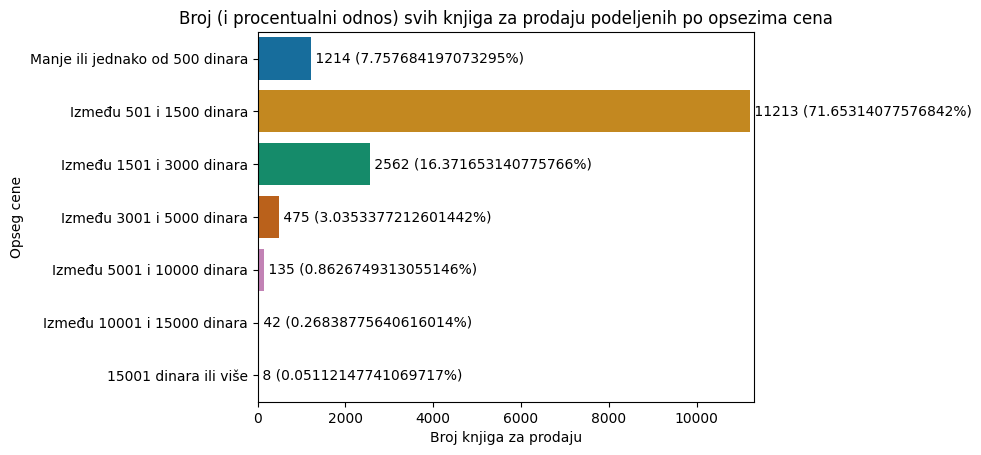

In [67]:
bins = [0, 500, 1500, 3000, 5000, 10000, 15000, float('inf')]
labels = ["Manje ili jednako od 500 dinara", "Između 501 i 1500 dinara", "Između 1501 i 3000 dinara", "Između 3001 i 5000 dinara", "Između 5001 i 10000 dinara", "Između 10001 i 15000 dinara", "15001 dinara ili više"]
books['price_range'] = pd.cut(books['price'], bins = bins, labels = labels) #svrstava u neku kategoriju i dodeljuje labelu te kategorije polju price_range
price_ranges_books_count = books['price_range'].value_counts().sort_index()
price_ranges_books_percentages = price_ranges_books_count.values / (len(books) / 100)

price_range_barplot = sb.barplot(x=price_ranges_books_count.values, y = price_ranges_books_count.index, palette='colorblind')
for i in range(len(price_ranges_books_count.values)):
    price_range_barplot.text(price_ranges_books_count.values[i], i, f" {price_ranges_books_count.values[i]} ({price_ranges_books_percentages[i]}%)", va='center')

price_range_barplot.set_xlim(0, 11300)
plt.ylabel('Opseg cene')
plt.xlabel('Broj knjiga za prodaju')
plt.title('Broj (i procentualni odnos) svih knjiga za prodaju podeljenih po opsezima cena')
plt.show()



<h3>f) The number (and percentage) of books for sale that are hardcover, in relation to the total 
number of books for sale (published in the last 3 years). </h3>

C:\Users\SSS\AppData\Local\Temp\ipykernel_31888\1045852732.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




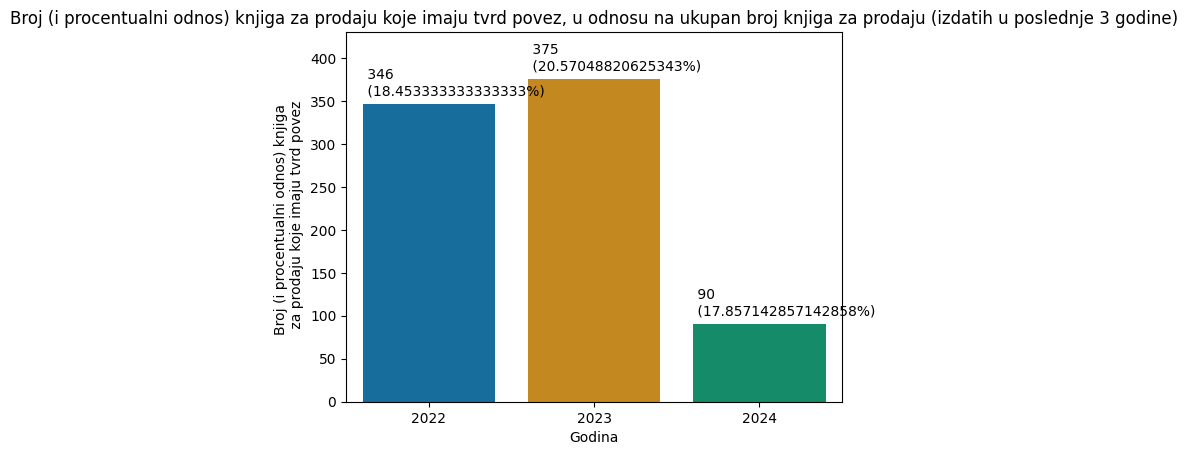

In [62]:
temp = books[books['year'] > 2021]
books_last_three_years_hard_binding = temp[temp['cover_binding'] == 'tvrd']['year'].value_counts().sort_index()
books_last_three_years = temp['year'].value_counts().sort_index()
hard_binding_percentages = books_last_three_years_hard_binding / (books_last_three_years / 100)

hard_binding_plot = sb.barplot(y =books_last_three_years_hard_binding.values, x = books_last_three_years_hard_binding.index, palette='colorblind')
for i in range(len(books_last_three_years_hard_binding.index)):
    hard_binding_plot.text(i-0.4,books_last_three_years_hard_binding.values[i]+25, f" {books_last_three_years_hard_binding.values[i]} \n ({hard_binding_percentages.values[i]}%)", va='center')

hard_binding_plot.set_ylim(0, 430)
plt.xlabel('Godina')
plt.ylabel('Broj (i procentualni odnos) knjiga \n za prodaju koje imaju tvrd povez')
plt.title('Broj (i procentualni odnos) knjiga za prodaju koje imaju tvrd povez, u odnosu na ukupan broj knjiga za prodaju (izdatih u poslednje 3 godine)')
plt.show()